<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques that are used to avoid overfitting (but haven't practiced them yet). In this project, we'll practice a fundamental method for avoiding overfitting that is commonly referred to as: _train/test split validation_. 

This is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we will be splitting the data into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California, 20 percent data from elsewhere, and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case, we've still overfit on our data set because we did not sufficiently randomize the data.

Note: In a situation like this, you could use a technique called _k-fold cross-validation_, which is cross-validation applied to more than two subsets. In particular, in k-fold cross-validation, you'd partition your data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. You would do this for each of the possible $k-1$ subsets.

# Project Requirements

The goal of this project will be to create a test-training split to compare multiple models on the same Boston housing data set. For example, you might choose to compare different linear models on the same data.

In this project, you'll fit two to three different models on the Boston housing data. For example, you could pick two different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Work with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train your model on the training data.
* Evaluate your model on the test data.
* Repeat with other variables.
* Rank the models by how well they score on the testing data set. 
* Don't forget to interpret your findings! 



A k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression

As a real estate developer, you are being asked to model the median home price of various houses in the city of Boston using data from the US census. Your goal is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose.

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])
y = np.log(y)
#added this, will want the log of y always

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### REQUIRED: Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it _ought_ to be pretty clean, but you should always perform exploratory data analysis.

In [ ]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column


In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X.isnull().sum()
#doesn't seem to be any null values in this set

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [5]:
X.dtypes
#every column is a float which is what we want here.  If there were categorical columns, we'd want to one hot encode.

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [6]:
X.shape
#the data set only has 503 rows, pretty small so probably expect some variance when cutting into test and train sets

(506, 13)

In [7]:
import pandas as pd
X.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

In [8]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Using `scikit-learn` Linear Regression

### REQUIRED: Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict your target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [13]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score


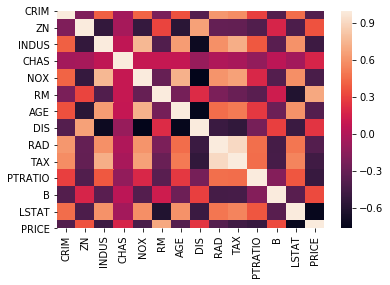

In [9]:
import seaborn as sns
import pandas as pd

df= pd.read_csv('/Users/kinaabe/Kinadat/dat-1-21/Unit3/data/housing.csv')
sns.heatmap(df.corr())
# run heatmap to see which values are correlated to price.  i used a different data set to do this because it included
#the Y variable in the housing.csv set.  This boston set splits the Y upfront.  By running this, I can choose the 
#variables I believe are highly correlated with PRICE.  Doing this instead of randomly picking columns.
#LSTAT 
#PTRATIO
#TAX
#RAD
#INDUS

In [10]:
X = X[['LSTAT', 'PTRATIO', 'TAX','RAD', 'INDUS']]
X.head()
#cutting the dataframe here into the columns I care about.  

,LSTAT,PTRATIO,TAX,RAD,INDUS
0,4.98,15.3,296.0,1.0,2.31
1,9.14,17.8,242.0,2.0,7.07
2,4.03,17.8,242.0,2.0,7.07
3,2.94,18.7,222.0,3.0,2.18
4,5.33,18.7,222.0,3.0,2.18


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# standardize the set.  Instead of manually doing this, we can use the StandardScaler.  
X = sc.fit_transform(X)

In [14]:
lreg = LinearRegression()
lreg.fit(X, y)
lreg.score(X, y)

0.7101349095963227

In [43]:
ridge = Ridge()
ridge.fit(X,y)
ridge.score(X,y)

0.7101227315400359

In [16]:
lasso = Lasso()
lasso.fit(X,y)
lasso.score(X,y)

0.0

In [50]:
#here I try to see if there is improvement to the score if different alpha is used.  
#I'm actually not sure why the scores are so low though, the alpha in line 15 should be =1 which means the score produced
#there should be somewhat similar to the score in  (0.21571362643790443, 1.0)... Perhaps because the cv fold? changed
#it from 10 to 5 and it looks better.  
ridge_scores = []
alphas = np.logspace(-3,3,7)

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    scores = cross_val_score(estimator = ridge,X=X,y=y,cv=5)
    ridge_scores.append((np.mean(scores),alpha))

In [51]:
ridge_scores

[(0.5439850870004165, 0.001),
 (0.5439894132044467, 0.01),
 (0.5440320685139101, 0.1),
 (0.5444017936588985, 1.0),
 (0.5447809523436251, 10.0),
 (0.5070383101358387, 100.0),
 (0.13941823769122347, 1000.0)]

Overall, the results tell me that normal linear regression is the best model for this data set and columns I chose. 

### REQUIRED: Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.
Score and plot both of these approaches. How do your metrics change? What does this tell us about the size of training/testing splits? Include a written response.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [36]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
lreg.score(X_test, y_test)
#we want to fit on the trainingset, score on the test

0.724125685291064

In [37]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, random_state=2)

In [38]:
lreg = LinearRegression()
lreg.fit(X_train2, y_train2)
lreg.score(X_test2, y_test2)

0.6527569947559408

Yes the training to testing set differences change the results of the score.  We went from a score of 72% to 65% just by changing the training set from 30 to 10.  

## BONUS: Try the k-fold cross-validation technique described above, varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds? Include a written response.

In [39]:
k_scores = []
folds = [5,6,7,8,9,10]

for fold in folds:
    scores = cross_val_score(estimator=lreg, X=X_test, y=y_test, cv=fold)
    k_scores.append((np.mean(scores),fold))

In [40]:
k_scores

[(0.7038287655300131, 5),
 (0.6933154708839845, 6),
 (0.7041487335911546, 7),
 (0.6851726414638141, 8),
 (0.6854155262642033, 9),
 (0.6784691342926726, 10)]

In [41]:
max(k_scores)

(0.7041487335911546, 7)

By cross validating the data, we find that there is a reduction in the realistic score of the data.  Before, we saw a score of 0.7835493319350365 on our test set but by slicing the data in different ways and scoring on different aspects of the data set, the more realistic score observed is .75.  

## BONUS
Practice the same workflow you just worked through above, but this time use Statsmodels instead of Sklearn for linear regression. See example formulas below.

### Example: Statsmodels Formulas

Adjust the formula using your chosen metrics from the housing data. Remember, your workflow here is the same, but the syntax is a little different. Describe your results. Are they comparable to scikit-learn's regression models?

In [ ]:
# First, format your data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

In [ ]:
# Set up your new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

### BONUS:

Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

### BONUS:

Given a combination of predictors, can you identify another response variable that could be accurately predicted through the exploration of different predictors in this data set?

_Tip: Consider pairplots, coefficients, or Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

In [ ]:
# Check out Pearson scores


## BONUS/DEMO: Up for an additional challenge? Try again, this time using the `patsy` library.

You can read more about it here: https://patsy.readthedocs.io/en/latest/

In [ ]:
import patsy

# Use the patsy library to run a regression model on the housing dataset
